## Import modules

In [1]:
# Dataframes
import pandas as pd
import geopandas as gpd

# Data visualisation
import matplotlib.pyplot as plt
import folium

pd.set_option('display.max_columns', None) #-- to show all columns in a dataframe. To reset: pd.reset_option(“max_columns”)



# (Geo-)DataFrames - Tabular data in python; An introduction

__DataFrames:__

- What They Are: Tables of data.
- Made Up Of: Rows and columns (imagine a grid). Two main data structures - Series (1D labeled array) and DataFrame (2D labeled table).



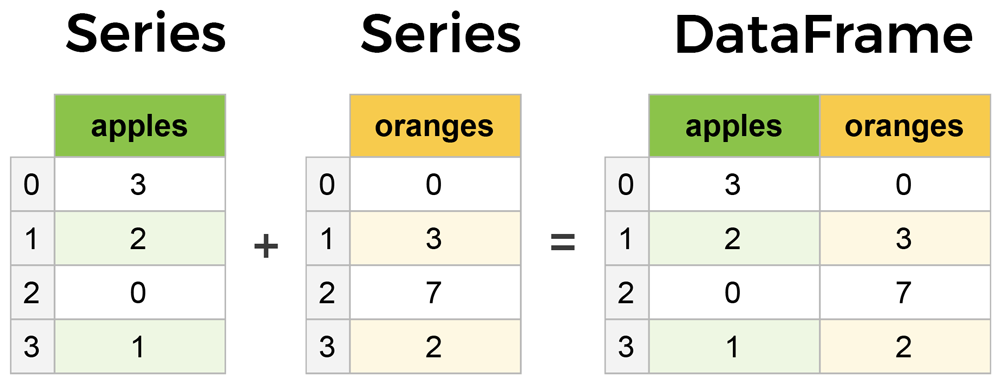

__Pandas:__

- Use: Deals with regular tables of data (think Excel spreadsheets).
- Main Things: Understands rows and columns of information.
- Helps With: Sorting, filtering, and analyzing data easily.
- Pandas Ecosystem:

        NumPy:

        - Role: Provides support for large, multi-dimensional arrays and matrices.
        - Use in Pandas: Pandas is built on top of NumPy, leveraging its numerical capabilities for efficient data manipulation.

        Matplotlib:

        - Role: A 2D plotting library for creating visualizations.
        - Use in Pandas: Pandas uses Matplotlib for basic plotting and visualization of data.

        SciPy:

        - Role: A library for scientific and technical computing.
        - Use in Pandas: Pandas uses SciPy for statistical and scientific computations.


__Geopandas:__

- Pandas' Buddy: Works with data like pandas but adds a twist for maps.
- Special Power: Handles maps and location data (like plotting points on a map).
- Good For: Making maps, analyzing places, and playing with geography in Python.
- Geopandas Ecosystem:

        Shapely:

        - Role: Handles geometric operations (points, lines, polygons) for spatial data.
        - Use in Geopandas: Geopandas relies on Shapely for geometric manipulations.

        Fiona:

        - Role: Reads and writes spatial data files.
        - Use in Geopandas: Geopandas uses Fiona to read and write geographic data files.

        PyProj:

        - Role: Performs cartographic projections and transformations.
        - Use in Geopandas: Geopandas uses PyProj for coordinate transformations.
  
        Matplotlib:

        - Role: A 2D plotting library for creating visualizations (this time, maps).
        - Use in GeoPandas: GeoPandas uses Matplotlib for basic plotting and visualization of data.








### So what changes with a GeoDataframe? We add geometries, and support for their operations.

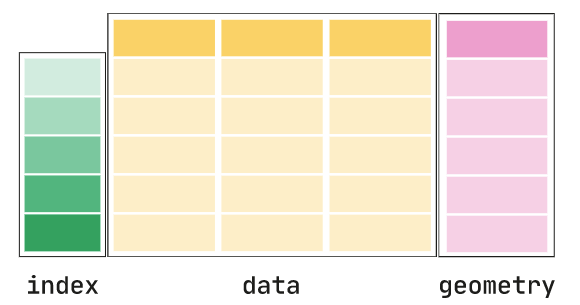

## Part 1: Pandas and GeoPandas basics.

### 1.1: Read a file into a pandas DataFrame and explore

Pandas is versatile and can read a variety of formats, such as csv, json, xml, spss etc. 

The commands are read_'format', e.g. read_csv, read_json, read_excel, read_xml, read_html, read_spss etc.

More: https://pandas.pydata.org/docs/reference/io.html

In [2]:
# Read in csv: 
admin_csv = pd.read_csv('../data/raw_data/gadm41_NLD_2_no_geom.csv')

First rows

In [3]:
admin_csv.head()

GID_2 GID_0      COUNTRY    GID_1   NAME_1  NL_NAME_1         NAME_2  \
0  NLD.1.1_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN      AaenHunze   
1  NLD.1.2_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN          Assen   
2  NLD.1.3_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN  Borger-Odoorn   
3  NLD.1.4_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN      Coevorden   
4  NLD.1.5_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN       DeWolden   

  VARNAME_2  NL_NAME_2    TYPE_2     ENGTYPE_2  CC_2    HASC_2  
0       NaN        NaN  Gemeente  Municipality   NaN  NL.DR.AH  
1       NaN        NaN  Gemeente  Municipality   NaN  NL.DR.AS  
2       NaN        NaN  Gemeente  Municipality   NaN  NL.DR.BO  
3       NaN        NaN  Gemeente  Municipality   NaN  NL.DR.CO  
4       NaN        NaN  Gemeente  Municipality   NaN  NL.DR.DW

Last rows

In [5]:
admin_csv.tail(10)

GID_2 GID_0      COUNTRY     GID_1              NAME_1  NL_NAME_1  \
345   NLD.14.81_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
346   NLD.14.82_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
347   NLD.14.84_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
348  NLD.14.103_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
349   NLD.14.86_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
350   NLD.14.89_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
351   NLD.14.90_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
352  NLD.14.104_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
353   NLD.14.91_1   NLD  Netherlands  NLD.14_1        Zuid-Holland        NaN   
354    NLD.14.1_1   NLD  Netherlands  NLD.14_1  ZuidHollandseMeren        NaN   

                 NAME_2 VARNAME_2  NL_NAME_2    TYPE_2     ENGTYPE_2  CC_2  \
345         Voorschoten       NaN        NaN  Gemeente  Municipality   NaN   
346         Waddinxveen       NaN        NaN  Gemeente  Municipality   NaN   
347           Wassenaar       NaN        NaN  Gemeente  Municipality   NaN   
348            Westland       NaN        NaN  Gemeente  Municipality   NaN   
349          Westvoorne       NaN        NaN  Gemeente  Municipality   NaN   
350          Zoetermeer       NaN        NaN  Gemeente  Municipality   NaN   
351         Zoeterwoude       NaN        NaN  Gemeente  Municipality   NaN   
352            Zuidplas       NaN        NaN  Gemeente  Municipality   NaN   
353         Zwijndrecht       NaN        NaN  Gemeente  Municipality   NaN   
354  ZuidHollandseMeren       NaN        NaN  Gemeente     Waterbody   NaN   

       HASC_2  
345  NL.ZH.VS  
346  NL.ZH.WX  
347  NL.ZH.WS  
348       NaN  
349  NL.ZH.WE  
350  NL.ZH.ZR  
351  NL.ZH.ZD  
352       NaN  
353  NL.ZH.ZW  
354       NaN

Shape of Dataframe

In [8]:
admin_csv.shape

(355, 13)

### 1.2: GeoPandas and loading directly into GeoDataFrame.

In [10]:
admin_geom = gpd.read_file('../data/raw_data/gadm41_NLD_2_geom.json')
admin_geom.head()

NAME_2                                           geometry
0      AaenHunze  MULTIPOLYGON (((6.56990 52.94650, 6.58990 52.9...
1          Assen  MULTIPOLYGON (((6.64080 53.02570, 6.63920 53.0...
2  Borger-Odoorn  MULTIPOLYGON (((6.74570 52.87920, 6.73630 52.9...
3      Coevorden  MULTIPOLYGON (((6.87160 52.65300, 6.86450 52.6...
4       DeWolden  MULTIPOLYGON (((6.27320 52.66810, 6.27640 52.6...

### 1.3: Merging Dataframes

#### We can use .merge() to combine two DataFrames. The 'how' parameter specifies the type of merge:
- 'inner' (default): Keeps only the common values in both DataFrames
- 'left': Keeps all values from the left DataFrame and only common values from the right DataFrame
- 'right': Keeps all values from the right DataFrame and only common values from the left DataFrame
- 'outer': Keeps all values from both DataFrames, filling missing values with NaN

In this case, all result in the same. 

![joins](../data/types-of-joins.png)

want to know more: https://pandas.pydata.org/docs/user_guide/merging.html

In [11]:
admin = admin_geom.merge(admin_csv, on='NAME_2')
admin.head()

NAME_2                                           geometry  \
0      AaenHunze  MULTIPOLYGON (((6.56990 52.94650, 6.58990 52.9...   
1          Assen  MULTIPOLYGON (((6.64080 53.02570, 6.63920 53.0...   
2  Borger-Odoorn  MULTIPOLYGON (((6.74570 52.87920, 6.73630 52.9...   
3      Coevorden  MULTIPOLYGON (((6.87160 52.65300, 6.86450 52.6...   
4       DeWolden  MULTIPOLYGON (((6.27320 52.66810, 6.27640 52.6...   

       GID_2 GID_0      COUNTRY    GID_1   NAME_1  NL_NAME_1 VARNAME_2  \
0  NLD.1.1_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN       NaN   
1  NLD.1.2_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN       NaN   
2  NLD.1.3_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN       NaN   
3  NLD.1.4_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN       NaN   
4  NLD.1.5_1   NLD  Netherlands  NLD.1_1  Drenthe        NaN       NaN   

   NL_NAME_2    TYPE_2     ENGTYPE_2  CC_2    HASC_2  
0        NaN  Gemeente  Municipality   NaN  NL.DR.AH  
1        NaN  Gemeente  Municipality   NaN  NL.DR.AS  
2        NaN  Gemeente  Municipality   NaN  NL.DR.BO  
3        NaN  Gemeente  Municipality   NaN  NL.DR.CO  
4        NaN  Gemeente  Municipality   NaN  NL.DR.DW

In [12]:
# Get a quick overview of dataframe structure with .shape
admin.shape

(357, 14)

#### In case you need to catch up:

In [13]:
admin = gpd.read_file('../data/raw_data/gadm41_NLD_2.json')

## Part 2: Filter rows by index / attribute.

There are two essential functions to filter rows: __loc and iloc__

With loc and iloc you can do practically any data selection operation on DataFrames you can think of. 

- loc gets rows (and/or columns) with particular labels - label-based.

- iloc gets rows (and/or columns) at integer locations - index based.


### 2.1: Filtering by index

Single column/row

In [14]:
admin.NAME_1.iloc[4]

'Drenthe'

Single column/many rows

In [15]:
admin.NAME_2.iloc[10:20]

10           Tynaarlo
11         Westerveld
12             Almere
13            Dronten
14           Lelystad
15    Noordoostpolder
16                Urk
17           Zeewolde
18      Achtkarspelen
19            Ameland
Name: NAME_2, dtype: object

Multiple rows, all columns

In [16]:
admin.iloc[10:20]

GID_2 GID_0      COUNTRY    GID_1     NAME_1 NL_NAME_1  \
10  NLD.1.11_1   NLD  Netherlands  NLD.1_1    Drenthe        NA   
11  NLD.1.12_1   NLD  Netherlands  NLD.1_1    Drenthe        NA   
12   NLD.2.1_1   NLD  Netherlands  NLD.2_1  Flevoland        NA   
13   NLD.2.2_1   NLD  Netherlands  NLD.2_1  Flevoland        NA   
14   NLD.2.3_1   NLD  Netherlands  NLD.2_1  Flevoland        NA   
15   NLD.2.4_1   NLD  Netherlands  NLD.2_1  Flevoland        NA   
16   NLD.2.5_1   NLD  Netherlands  NLD.2_1  Flevoland        NA   
17   NLD.2.6_1   NLD  Netherlands  NLD.2_1  Flevoland        NA   
18   NLD.3.1_1   NLD  Netherlands  NLD.3_1    Fryslân        NA   
19   NLD.3.2_1   NLD  Netherlands  NLD.3_1    Fryslân        NA   

             NAME_2  VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2  \
10         Tynaarlo  Zuidlaren        NA  Gemeente  Municipality   NA   
11       Westerveld         NA        NA  Gemeente  Municipality   NA   
12           Almere         NA        NA  Gemeente  Municipality   NA   
13          Dronten         NA        NA  Gemeente  Municipality   NA   
14         Lelystad         NA        NA  Gemeente  Municipality   NA   
15  Noordoostpolder         NA        NA  Gemeente  Municipality   NA   
16              Urk         NA        NA  Gemeente  Municipality   NA   
17         Zeewolde         NA        NA  Gemeente  Municipality   NA   
18    Achtkarspelen         NA        NA  Gemeente  Municipality   NA   
19          Ameland         NA        NA  Gemeente  Municipality   NA   

      HASC_2                                           geometry  
10  NL.DR.TY  MULTIPOLYGON (((6.78660 53.09420, 6.75780 53.0...  
11  NL.DR.WE  MULTIPOLYGON (((6.45570 52.78590, 6.44540 52.7...  
12  NL.FL.AL  MULTIPOLYGON (((5.35520 52.40050, 5.35080 52.3...  
13  NL.FL.DR  MULTIPOLYGON (((5.59430 52.41120, 5.59430 52.4...  
14  NL.FL.LE  MULTIPOLYGON (((5.35130 52.40140, 5.33750 52.4...  
15  NL.FL.NO  MULTIPOLYGON (((5.63760 52.63530, 5.64710 52.6...  
16  NL.FL.UR  MULTIPOLYGON (((5.59810 52.67610, 5.60250 52.6...  
17  NL.FL.ZE  MULTIPOLYGON (((5.32160 52.30350, 5.33780 52.3...  
18  NL.FR.AC  MULTIPOLYGON (((6.02560 53.24020, 6.02710 53.2...  
19  NL.FR.AM  MULTIPOLYGON (((5.67420 53.47150, 5.68860 53.4...

Watch out, index starts at 0!

### 2.2: Filtering by (column) attributes

In [17]:
# Get unique values of a column
admin.NAME_1.unique()

array(['Drenthe', 'Flevoland', 'Fryslân', 'Gelderland', 'Groningen',
       'IJsselmeer', 'Limburg', 'Noord-Brabant', 'Noord-Holland',
       'Overijssel', 'Utrecht', 'Zeeland', 'Zeeuwsemeren', 'Zuid-Holland',
       'ZuidHollandseMeren'], dtype=object)

Build a boolean (True/False) mask using loc

In [18]:
# No. 1:
admin.loc[admin['NAME_1'] == 'Limburg']

GID_2 GID_0      COUNTRY    GID_1   NAME_1 NL_NAME_1  \
98    NLD.7.3_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
99   NLD.7.48_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
100   NLD.7.4_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
101   NLD.7.5_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
102   NLD.7.6_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
103   NLD.7.7_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
104  NLD.7.49_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
105   NLD.7.9_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
106  NLD.7.10_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
107  NLD.7.13_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
108  NLD.7.16_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
109  NLD.7.18_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
110  NLD.7.20_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
111  NLD.7.50_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
112  NLD.7.51_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
113  NLD.7.23_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
114  NLD.7.26_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
115  NLD.7.28_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
116  NLD.7.29_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
117  NLD.7.52_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
118  NLD.7.32_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
119  NLD.7.33_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
120  NLD.7.37_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
121  NLD.7.38_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
122  NLD.7.39_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
123  NLD.7.42_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
124  NLD.7.43_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
125  NLD.7.44_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
126  NLD.7.45_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
127  NLD.7.46_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
128  NLD.7.47_1   NLD  Netherlands  NLD.7_1  Limburg        NA   

                  NAME_2 VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2  \
98                  Beek        NA        NA  Gemeente  Municipality   NA   
99            Beekdaelen        NA        NA  Gemeente  Municipality   NA   
100               Beesel        NA        NA  Gemeente  Municipality   NA   
101               Bergen        NA        NA  Gemeente  Municipality   NA   
102             Brunssum        NA        NA  Gemeente  Municipality   NA   
103        Echt-Susteren        NA        NA  Gemeente  Municipality   NA   
104    Eijsden-Margraten        NA        NA  Gemeente  Municipality   NA   
105               Gennep        NA        NA  Gemeente  Municipality   NA   
106        Gulpen-Wittem        NA        NA  Gemeente  Municipality   NA   
107              Heerlen        NA        NA  Gemeente  Municipality   NA   
108       HorstaandeMaas        NA        NA  Gemeente  Municipality   NA   
109             Kerkrade        NA        NA  Gemeente  Municipality   NA   
110            Landgraaf        NA        NA  Gemeente  Municipality   NA   
111               Leudal        NA        NA  Gemeente  Municipality   NA   
112             Maasgouw        NA        NA  Gemeente  Municipality   NA   
113           Maastricht        NA        NA  Gemeente  Municipality   NA   
114             Meerssen        NA        NA  Gemeente  Municipality   NA   
115      MookenMiddelaar        NA        NA  Gemeente  Municipality   NA   
116           Nederweert        NA        NA  Gemeente  Municipality   NA   
117           PeelenMaas        NA        NA  Gemeente  Municipality   NA   
118            Roerdalen        NA        NA  Gemeente  Municipality   NA   
119             Roermond        NA        NA  Gemeente  Municipality   NA   
120           Simpelveld        NA        NA  Gemeente  Municipality   NA   
121       Sittard-Geleen        NA        NA  Gem

#### There are to different ways to call columns - df['xxx'] vs df.xxx

In [19]:
# No. 2:
admin.loc[admin.NAME_1 == 'Limburg']

GID_2 GID_0      COUNTRY    GID_1   NAME_1 NL_NAME_1  \
98    NLD.7.3_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
99   NLD.7.48_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
100   NLD.7.4_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
101   NLD.7.5_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
102   NLD.7.6_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
103   NLD.7.7_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
104  NLD.7.49_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
105   NLD.7.9_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
106  NLD.7.10_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
107  NLD.7.13_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
108  NLD.7.16_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
109  NLD.7.18_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
110  NLD.7.20_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
111  NLD.7.50_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
112  NLD.7.51_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
113  NLD.7.23_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
114  NLD.7.26_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
115  NLD.7.28_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
116  NLD.7.29_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
117  NLD.7.52_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
118  NLD.7.32_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
119  NLD.7.33_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
120  NLD.7.37_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
121  NLD.7.38_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
122  NLD.7.39_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
123  NLD.7.42_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
124  NLD.7.43_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
125  NLD.7.44_2   NLD  Netherlands  NLD.7_1  Limburg        NA   
126  NLD.7.45_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
127  NLD.7.46_1   NLD  Netherlands  NLD.7_1  Limburg        NA   
128  NLD.7.47_1   NLD  Netherlands  NLD.7_1  Limburg        NA   

                  NAME_2 VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2  \
98                  Beek        NA        NA  Gemeente  Municipality   NA   
99            Beekdaelen        NA        NA  Gemeente  Municipality   NA   
100               Beesel        NA        NA  Gemeente  Municipality   NA   
101               Bergen        NA        NA  Gemeente  Municipality   NA   
102             Brunssum        NA        NA  Gemeente  Municipality   NA   
103        Echt-Susteren        NA        NA  Gemeente  Municipality   NA   
104    Eijsden-Margraten        NA        NA  Gemeente  Municipality   NA   
105               Gennep        NA        NA  Gemeente  Municipality   NA   
106        Gulpen-Wittem        NA        NA  Gemeente  Municipality   NA   
107              Heerlen        NA        NA  Gemeente  Municipality   NA   
108       HorstaandeMaas        NA        NA  Gemeente  Municipality   NA   
109             Kerkrade        NA        NA  Gemeente  Municipality   NA   
110            Landgraaf        NA        NA  Gemeente  Municipality   NA   
111               Leudal        NA        NA  Gemeente  Municipality   NA   
112             Maasgouw        NA        NA  Gemeente  Municipality   NA   
113           Maastricht        NA        NA  Gemeente  Municipality   NA   
114             Meerssen        NA        NA  Gemeente  Municipality   NA   
115      MookenMiddelaar        NA        NA  Gemeente  Municipality   NA   
116           Nederweert        NA        NA  Gemeente  Municipality   NA   
117           PeelenMaas        NA        NA  Gemeente  Municipality   NA   
118            Roerdalen        NA        NA  Gemeente  Municipality   NA   
119             Roermond        NA        NA  Gemeente  Municipality   NA   
120           Simpelveld        NA        NA  Gemeente  Municipality   NA   
121       Sittard-Geleen        NA        NA  Gem

#### Beware when you're trying to call functions after calling columns. And beware of column names that emulate functions (e.g. datetime, a common example)

### 2.3: Split selection into new dataframe

         GID_2 GID_0      COUNTRY    GID_1         NAME_1 NL_NAME_1  \
193  NLD.9.4_1   NLD  Netherlands  NLD.9_1  Noord-Holland        NA   

        NAME_2 VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2    HASC_2  \
193  Amsterdam        NA        NA  Gemeente  Municipality   NA  NL.NH.AD   

                                              geometry  
193  MULTIPOLYGON (((5.01990 52.32420, 5.02570 52.3...  


<Axes: >

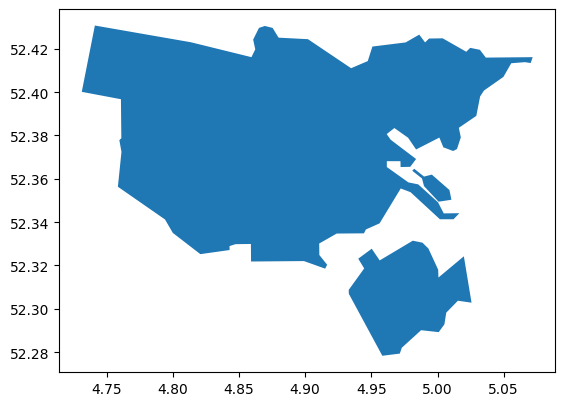

In [21]:
# Save a new variable to subset the dataframe, e.g. Amsterdam.
amsterdam = admin.loc[admin.NAME_2 == 'Amsterdam']
print(amsterdam)
amsterdam.plot()

## Part 3: Geographic vs Projected Coordinate Reference Systems (CRS)

A coordinate reference system (CRS) is a reference framework that defines the position of features in two- or three-dimensional space, in this case the Earth's surface. They facilitate accurate mapping, navigation, and spatial analysis.

#### Question: How can we find out info about the CRS?

In [22]:
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
# Let's have a look at the first row
print(admin.NAME_2.iloc[0])
print(admin.geometry[0])

AaenHunze
MULTIPOLYGON (((6.5699 52.9465, 6.5899 52.967, 6.6049 52.9722, 6.6051 52.9794, 6.6127 52.9829, 6.6174 52.9891, 6.616 52.9945, 6.6223 53.0053, 6.6406 53.0176, 6.6422 53.0221, 6.6392 53.023, 6.6408 53.0257, 6.6573 53.0265, 6.6531 53.0391, 6.6502 53.0418, 6.6518 53.0454, 6.6626 53.0551, 6.6716 53.0559, 6.6732 53.0613, 6.6807 53.0649, 6.6734 53.0694, 6.6633 53.0802, 6.6588 53.0794, 6.6573 53.0821, 6.6664 53.0838, 6.6797 53.0801, 6.7019 53.07, 6.7078 53.0654, 6.7214 53.0698, 6.7229 53.0689, 6.7577 53.0811, 6.7578 53.0838, 6.7548 53.0847, 6.7578 53.0864, 6.7866 53.0942, 6.9465 52.9936, 6.8488 52.9777, 6.7899 52.9613, 6.7375 52.9547, 6.7414 52.9376, 6.7339 52.9377, 6.7363 52.9152, 6.7457 52.8792, 6.7245 52.8687, 6.6963 52.8753, 6.6838 52.905, 6.6764 52.9096, 6.6347 52.9127, 6.6244 52.9182, 6.5947 52.9193, 6.5743 52.9447, 6.5699 52.9465)))


### Creating new columns

In [24]:
# Create new column with point geometry -> calculate centroid.
admin["centroid"] = admin.geometry.centroid

/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_39736/1923562560.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  admin["centroid"] = admin.geometry.centroid


#### Question: Why do we see this warning? 

Distance calculations in Geographic Coordinate Reference Systems (GCRS) can be potentially inaccurate due to the curvature of the Earth. 

In Geographic CRS', locations are specified in terms of latitude and longitude, which are angular measurements on a spherical or ellipsoidal surface. When calculating distances directly from these coordinates, __without considering the curvature of the Earth, errors can be introduced__.

The Earth is roughly spherical in shape, and as you move away from the equator, the meridians (lines of longitude) converge towards the poles. This means that one degree of longitude covers less ground near the poles than near the equator. Similarly, the distance covered by one degree of latitude remains relatively constant, but the actual distance on the ground varies due to the curvature of the Earth.

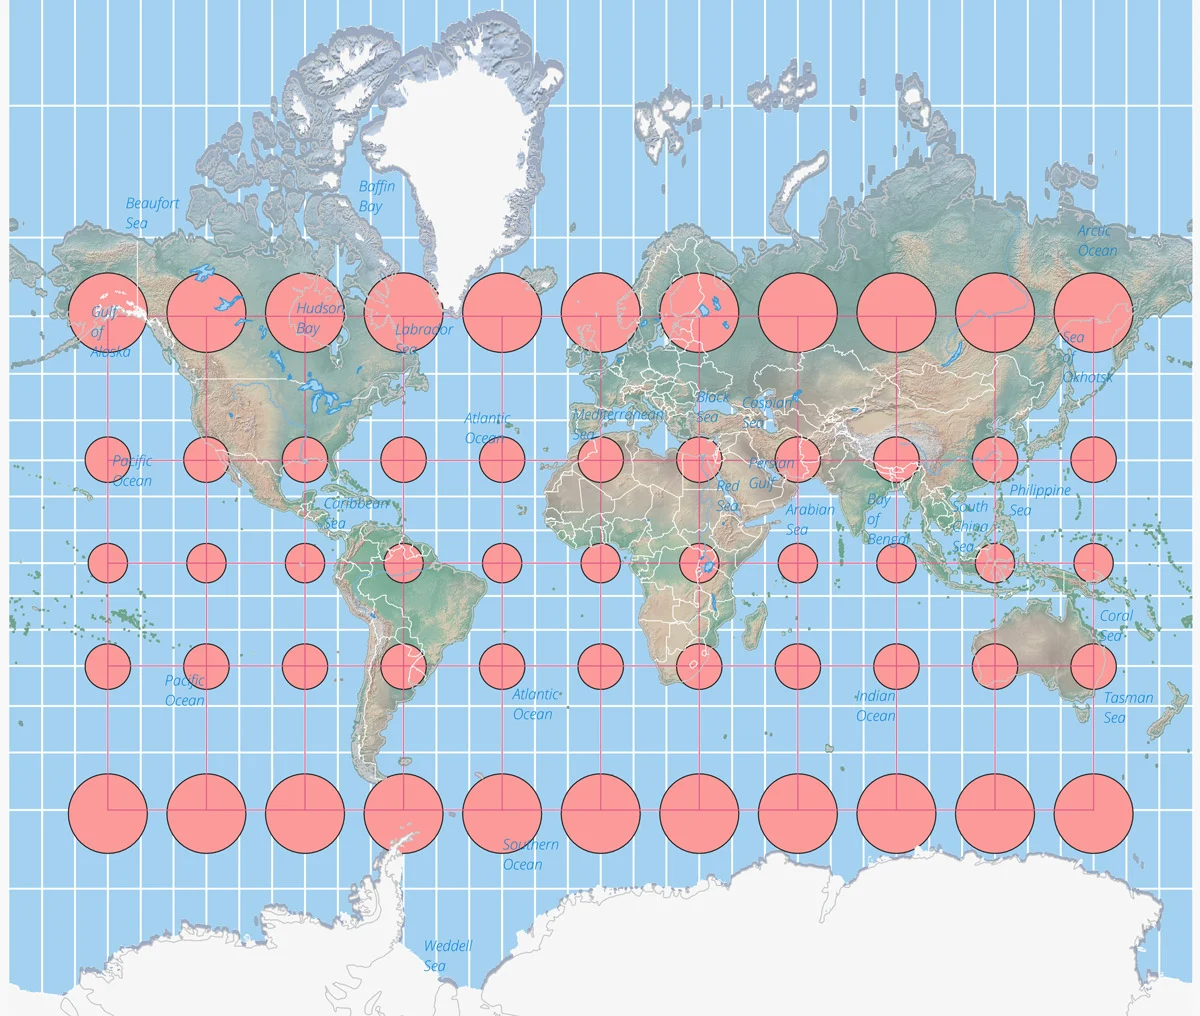

To mitigate these inaccuracies, especially in tasks where precise distance measurements are crucial, __it's common to use Projected Coordinate Reference Systems (PCRS)__ instead of GCRS. PCRS involves a mathematical __transformation of the 3D Earth onto a 2D plane__, allowing for more accurate distance calculations within the chosen projection.

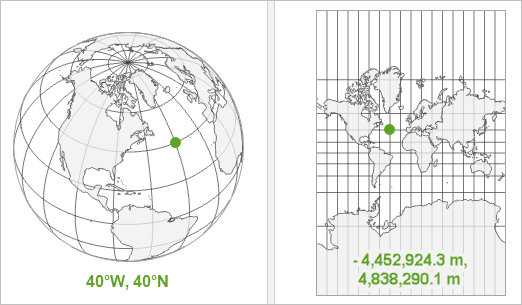


__Geographic vs Projected CRS (GCRS/PCRS); Key Differences:__

- Shape Representation: GCRS represents the Earth as a 3D object, while PCRS represents it as a 2D plane.
- Coordinate Units: GCRS uses angular units (degrees), while PCRS uses linear units (e.g., meters).
- Distortion: PCRS may introduce distortions, especially as you move away from the center of the projection, whereas GCRS maintains the natural shape of the Earth.

In summary, GCRS is based on latitude and longitude on a curved surface, while PCRS involves the flattening of the Earth's surface for practical mapping purposes. Each has its own advantages and is used for different applications based on the requirements of the task at hand.




####  Question: What CRS do we most commonly use in the Netherlands?


Hint: 
The central point of the system is the spire of the Onze Lieve Vrouwetoren ('Lange Jan') in Amersfoort (below).

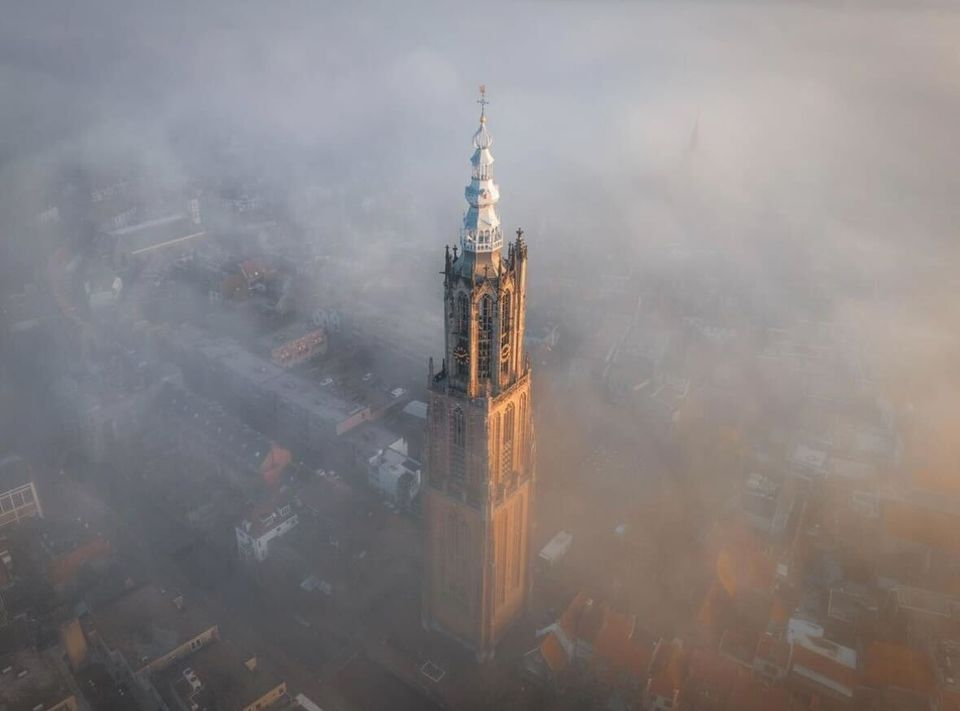

This point has the coordinates __x  = 155,000 m, y  = 463,000 m.__

These values have been chosen such that for every point on land throughout the European Netherlands, the x -coordinate is between 0 and 280 km and the y -coordinate is between 300 and 625 km. 

So __all coordinates have a positive value__ and __each y -coordinate is greater than the x -coordinate__. 

This means that no confusion can occur between the x and y coordinates if they are not explicitly labeled.

In [25]:
# In the Netherlands, generally use Amersfoort / RD New (EPSG:28992)
# It's a localized projection designed to minimize distortion within the Netherlands.
admin = admin.to_crs(28992)

In [26]:
admin.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [27]:
print(admin.NAME_2.iloc[0])
print(admin.geometry[0])

AaenHunze
MULTIPOLYGON (((234495.02260361786 551702.3053670189, 235801.2143451819 554005.5611212989, 236799.1336836757 554601.0703052187, 236799.04189901252 555402.4434981032, 237302.84012448863 555800.5343546055, 237606.69974981959 556495.7836545727, 237502.46065368102 557095.0428414755, 237904.84110440602 558303.9917172597, 239109.34376236203 559693.8134557926, 239207.9906776116 560196.4004824965, 239004.97124858538 560293.0458725619, 239107.09609690763 560595.3431787496, 240212.47928998235 560703.7299471142, 239906.1022869934 562100.7938700044, 239706.34485655586 562397.8165383068, 239806.6201457899 562800.2753272253, 240511.74789049206 563892.3671717145, 241113.54337392602 563992.095965346, 241210.09118658997 564594.8756873321, 241705.64915775874 565004.4480827821, 241207.41761540115 565496.4180746602, 240509.23951235 566686.1317458835, 240209.29315177165 566591.7853024339, 240103.49216996005 566890.4500493375, 240709.84218718074 567090.394983959, 241608.29772024986 566694.58219913

#### Question: What can we already tell by just looking at the coordinates?

## Part 4: Geographic features

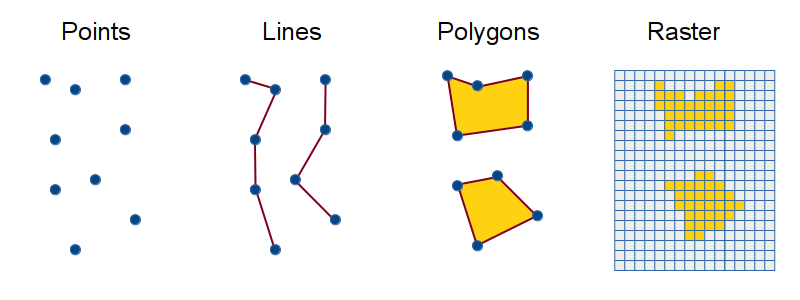

#### Question: What kind of data do we have here?

### 4.1 GeoDataFrames can easily be plotted

Plotting and increasing size of the figure:

<Axes: >

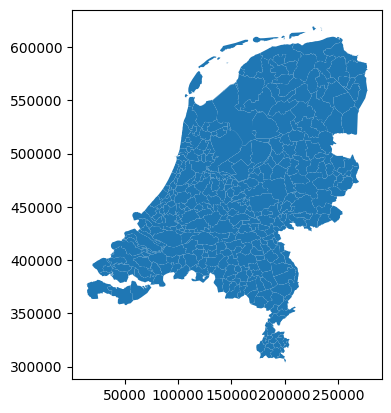

In [31]:
admin.plot(
    
)

#### We can also plot individual geometries by just calling the geometry:

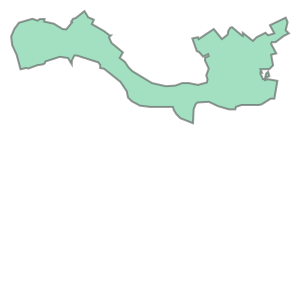

In [36]:
admin.geometry[340]

### 4.2: Let's try this centroid thing again, from polygon to point:

#### Question: What was the command again?

In [37]:
admin["centroid"] = admin.geometry.centroid

In [38]:
# The difference between Multipolygon and Point
print(f'(Multi-)Polygon: {admin.geometry[0]}')
print('------------------')
print(f'Point: {admin.centroid[0]}')

(Multi-)Polygon: MULTIPOLYGON (((234495.02260361786 551702.3053670189, 235801.2143451819 554005.5611212989, 236799.1336836757 554601.0703052187, 236799.04189901252 555402.4434981032, 237302.84012448863 555800.5343546055, 237606.69974981959 556495.7836545727, 237502.46065368102 557095.0428414755, 237904.84110440602 558303.9917172597, 239109.34376236203 559693.8134557926, 239207.9906776116 560196.4004824965, 239004.97124858538 560293.0458725619, 239107.09609690763 560595.3431787496, 240212.47928998235 560703.7299471142, 239906.1022869934 562100.7938700044, 239706.34485655586 562397.8165383068, 239806.6201457899 562800.2753272253, 240511.74789049206 563892.3671717145, 241113.54337392602 563992.095965346, 241210.09118658997 564594.8756873321, 241705.64915775874 565004.4480827821, 241207.41761540115 565496.4180746602, 240509.23951235 566686.1317458835, 240209.29315177165 566591.7853024339, 240103.49216996005 566890.4500493375, 240709.84218718074 567090.394983959, 241608.29772024986 566694.5

### 4.3: Plotting two layers on the same map (using ax)

Setting different geometry and plotting on the same map. 

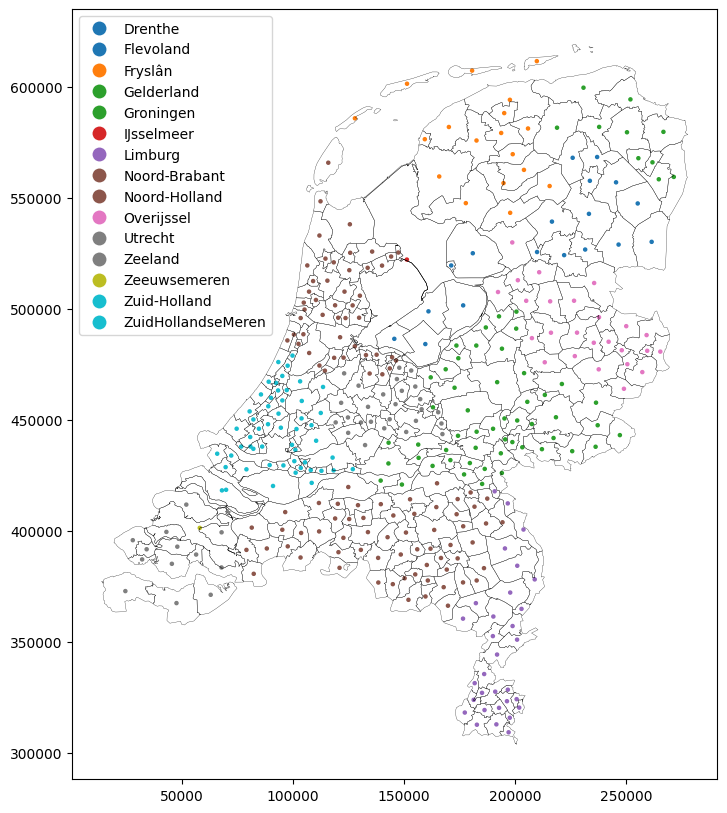

In [44]:
ax = admin.set_geometry("centroid").plot('NAME_1', 
                                         markersize=5, 
                                         figsize=(10,10),
                                         legend=True,
                                        )
admin.plot(ax=ax, 
           facecolor="none", 
           edgecolor="k", 
           linewidth=0.2,
);

#### Question 1: Why do the points have different colors?

#### Question 2: How do you think can we add a legend?

## Part 5: (Geo-)DataFrame interactions.
Let's add another dataset

In this case, we have a dataset from __Samenmeten__, an initiative by the Rijksinstituut voor Volksgezondheid en Milieu (RIVM).

The Samenmeten data portal is a central place where you can find and compare sensor data from citizen scientists, (decentralized) governments and other stakeholders - if you have/install a sensor, you can register it here.

![Samenmeten](../data/samenmeten.png)

### 5.1: Reading and interrogating another dataset

#### Question: How do we read new data?

In [45]:
sensors = gpd.read_file('../data/raw_data/samenmeten.json')
sensors.head()

id_x                        name_x           name_thing codegemeente  \
0  25430    loc-name-HLL_hl_device_539    HLL_hl_device_539          392   
1  25429    loc-name-HLL_hl_device_356    HLL_hl_device_356          479   
2  25391    loc-name-HLL_hl_device_356    HLL_hl_device_356          479   
3  25133    loc-name-HLL_hl_device_356    HLL_hl_device_356          479   
4  25428  loc-name-LUC_354724647886677  LUC_354724647886677          599   

     knmicode nh3closecode nh3regiocode nh3stadcode no2closecode no2regiocode  \
0  knmi_06225      NL10444      NL10444        None      NL10550      NL49703   
1  knmi_06240      NL10633      NL10633        None      NL49546      NL49703   
2  knmi_06240      NL10633      NL10633        None      NL49546      NL49703   
3  knmi_06240      NL10633      NL10633        None      NL49546      NL49703   
4  knmi_06344      NL10444      NL10444        None      NL10418      NL10437   

  no2stadcode               owner pm10closecode pm10regiocode pm10stadcode  \
0     NL10550   Hollandse Luchten       NL10550       NL49703      NL10550   
1     NL49007   Hollandse Luchten       NL49546       NL49703      NL49007   
2     NL49007   Hollandse Luchten       NL49546       NL49703      NL49007   
3     NL49007   Hollandse Luchten       NL49546       NL49703      NL49007   
4     NL01493  Gemeente Rotterdam       NL10418       NL10437      NL01487   

  pm25closecode pm25regiocode pm25stadcode            project  id_y  \
0       NL49703       NL49703      NL49007  Hollandse Luchten  7976   
1       NL49701       NL49703      NL49007  Hollandse Luchten  7858   
2       NL49701       NL49703      NL49007  Hollandse Luchten  7858   
3       NL49701       NL49703      NL49007  Hollandse Luchten  7858   
4       NL10418       NL10444      NL01487          Luchtclub  6028   

                name_y gemeentecode  random                       geometry  
0    HLL_hl_device_539         None       3  POINT (105078.461 488378.701)  
1    HLL_hl_device_356         None       5  POINT (117123.161 496282.980)  
2    HLL_hl_device_356         None       1  POINT (117926.306 494607.807)  
3    HLL_hl_device_356         None       4  POINT (116869.365 498621.637)  
4  LUC_354724647886677         None       3   POINT (92982.613 435550.661)

In [46]:
# Look at datatypes
sensors.dtypes

id_x                int64
name_x             object
name_thing         object
codegemeente       object
knmicode           object
nh3closecode       object
nh3regiocode       object
nh3stadcode        object
no2closecode       object
no2regiocode       object
no2stadcode        object
owner              object
pm10closecode      object
pm10regiocode      object
pm10stadcode       object
pm25closecode      object
pm25regiocode      object
pm25stadcode       object
project            object
id_y                int64
name_y             object
gemeentecode       object
random              int64
geometry         geometry
dtype: object

#### Question: How can we find out how many sensors we have?

In [47]:
sensors.shape

(13725, 24)

#### Question: What crs is the GeoDataFrame in?

In [48]:
sensors.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

#### Question: If we'd like to plot the dataframe, how do we do that? And how do we increase the size?

<Axes: >

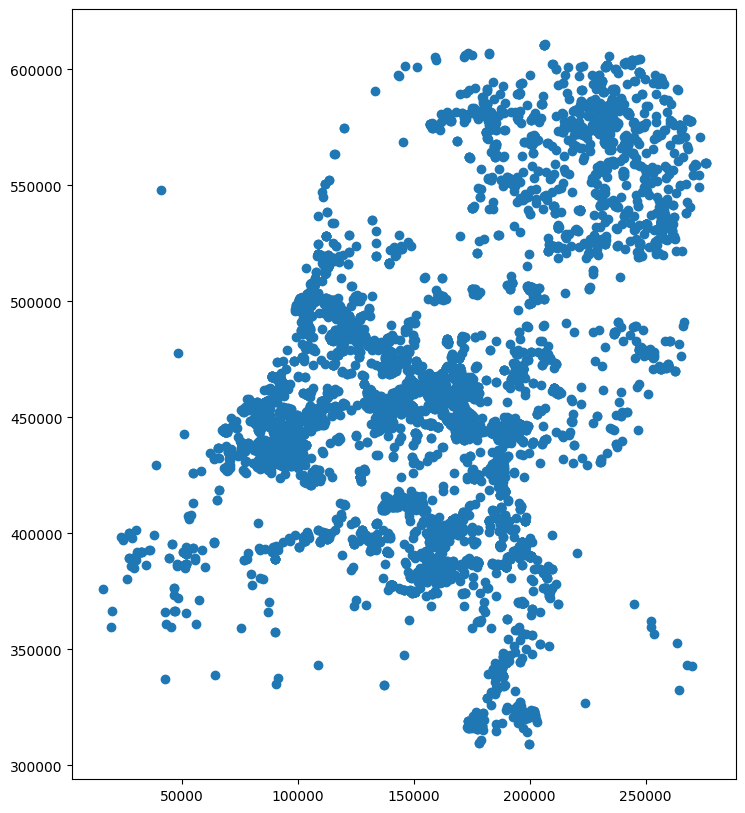

In [50]:
sensors.plot(
    figsize=(10,10)
)

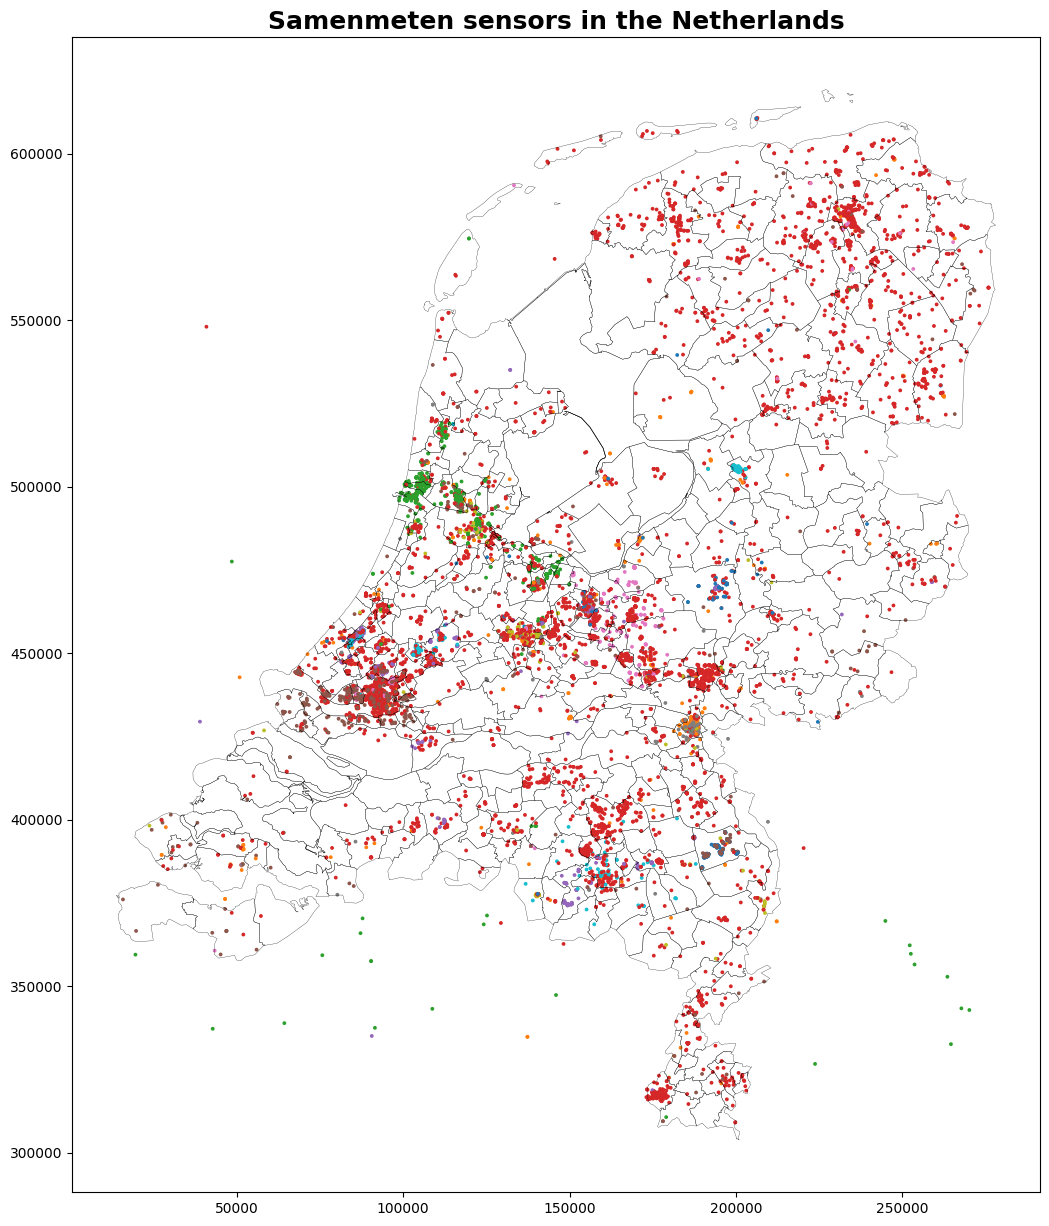

In [51]:
# Plot sensors - colored by attribute
ax = sensors.plot('project', 
                  markersize=3, 
                  figsize=(15,15),
                 )
# Plot polygons without color filling
admin.plot(ax=ax, 
           facecolor="none", 
           edgecolor="k", 
           linewidth=0.2,
);

plt.title("Samenmeten sensors in the Netherlands", fontweight='bold', fontsize=18)

plt.show()

### 5.2: How do we find out how many sensors are in each province? Overlay functions. 



When working with multiple spatial datasets – especially multiple polygon or line datasets – we often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets 
- intersections, 
- unions, and 
- differences. 

These types of operations are made available in the GeoPandas library through the `.overlay()` method.

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the DataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the left GeoDataFrame, this operation is executed against every other shape in the right GeoDataFrame:


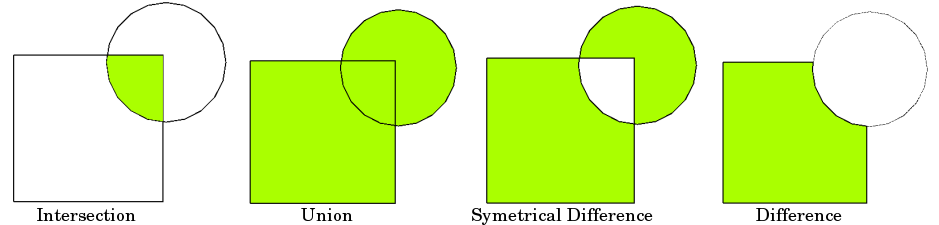

More info: https://geopandas.org/en/stable/docs/user_guide/set_operations.html

Not for today, but you can also use all other standard operations such as `.clip()`, `.buffer()`

#### Question: What method would be most appropriate here?

In [52]:
intersection = gpd.overlay(sensors, admin, how='intersection')

In [53]:
intersection.head()

id_x                      name_x         name_thing codegemeente  \
0  25430  loc-name-HLL_hl_device_539  HLL_hl_device_539          392   
1  25382  loc-name-HLL_hl_device_458  HLL_hl_device_458          392   
2  25379      loc-name-GLBPB_105-040      GLBPB_105-040          392   
3  25176  loc-name-HLL_hl_device_537  HLL_hl_device_537          392   
4  25125  loc-name-HLL_hl_device_537  HLL_hl_device_537          392   

     knmicode nh3closecode nh3regiocode nh3stadcode no2closecode no2regiocode  \
0  knmi_06225      NL10444      NL10444        None      NL10550      NL49703   
1  knmi_06240      NL10444      NL10444        None      NL10550      NL49703   
2  knmi_06225      NL10444      NL10444        None      NL10550      NL49703   
3  knmi_06225      NL10444      NL10444        None      NL10550      NL49703   
4  knmi_06225      NL10444      NL10444        None      NL10550      NL49703   

  no2stadcode              owner pm10closecode pm10regiocode pm10stadcode  \
0     NL10550  Hollandse Luchten       NL10550       NL49703      NL10550   
1     NL10550  Hollandse Luchten       NL10550       NL49703      NL10550   
2     NL10550              Globe       NL10550       NL49703      NL10550   
3     NL10550  Hollandse Luchten       NL10550       NL49703      NL10550   
4     NL10550  Hollandse Luchten       NL10550       NL49703      NL10550   

  pm25closecode pm25regiocode pm25stadcode            project  id_y  \
0       NL49703       NL49703      NL49007  Hollandse Luchten  7976   
1       NL49703       NL49703      NL49007  Hollandse Luchten  7967   
2       NL49551       NL49703      NL49007             Palmes  7964   
3       NL49551       NL49703      NL49007  Hollandse Luchten  7507   
4       NL49551       NL49703      NL49007  Hollandse Luchten  7507   

              name_y gemeentecode  random       GID_2 GID_0      COUNTRY  \
0  HLL_hl_device_539         None       3  NLD.9.21_1   NLD  Netherlands   
1  HLL_hl_device_458         None       3  NLD.9.21_1   NLD  Netherlands   
2      GLBPB_105-040         None       1  NLD.9.21_1   NLD  Netherlands   
3  HLL_hl_device_537         None       5  NLD.9.21_1   NLD  Netherlands   
4  HLL_hl_device_537         None       5  NLD.9.21_1   NLD  Netherlands   

     GID_1         NAME_1 NL_NAME_1   NAME_2 VARNAME_2 NL_NAME_2    TYPE_2  \
0  NLD.9_1  Noord-Holland        NA  Haarlem        NA        NA  Gemeente   
1  NLD.9_1  Noord-Holland        NA  Haarlem        NA        NA  Gemeente   
2  NLD.9_1  Noord-Holland        NA  Haarlem        NA        NA  Gemeente   
3  NLD.9_1  Noord-Holland        NA  Haarlem        NA        NA  Gemeente   
4  NLD.9_1  Noord-Holland        NA  Haarlem        NA        NA  Gemeente   

      ENGTYPE_2 CC_2    HASC_2                       centroid  \
0  Municipality   NA  NL.NH.HA  POINT (104781.086 488635.680)   
1  Municipality   NA  NL.NH.HA  POINT (104781.086 488635.680)   
2  Municipality   NA  NL.NH.HA  POINT (104781.086 488635.680)   
3  Municipality   NA  NL.NH.HA  POINT (104781.086 488635.680)   
4  Municipality   NA  NL.NH.HA  POINT (104781.086 488635.680)   

                        geometry  
0  POINT (105078.461 488378.701)  
1  POINT (105178.706 484816.982)  
2  POINT (103167.404 487953.318)  
3  POINT (102961.957 487844.207)  
4  POINT (102961.957 487844.207)

In [54]:
intersection.shape

(13674, 38)

### 5.3: For each sensor, we now added the spatially intersecting columns from our administrative areas.

#### Question: How do we get the count? We first need to aggregate and restructure a bit.

In [55]:
# There are many potential implementations, this is one of them:
admin_counts = intersection.groupby('NAME_1').size().reset_index(name='sensor_count')
admin_counts

NAME_1  sensor_count
0         Drenthe           478
1       Flevoland            89
2         Fryslân           340
3      Gelderland          2121
4       Groningen           459
5      IJsselmeer            19
6         Limburg           910
7   Noord-Brabant          1209
8   Noord-Holland          1691
9      Overijssel           296
10        Utrecht          1403
11        Zeeland            88
12   Zuid-Holland          4571

What did we do here:

- `.groupby()`
    - Purpose: This function is used to group rows of a DataFrame based on values in one or more columns.
    - Usage: After grouping, you typically apply an aggregation function (like sum, mean, etc.) to each group.
    
- `.size()`
    - Purpose: After grouping, .size() is often used to calculate the size (count) of each group.
    - Usage: It returns a Series with the group labels as the index and the size of each group as the values.
    
- `.reset_index()`
    - Purpose: After grouping and applying aggregation functions, .reset_index() is used to convert the grouped data back into a regular DataFrame.
    - Usage: It adds a default integer index to the grouped DataFrame and moves the group labels from the index to regular columns.

### 5.4: This isn't very intuitive, so we also want to reorganise the pandas DataFrame

Sorting values:

In [56]:
admin_counts.sort_values(by='sensor_count', ascending=True)

NAME_1  sensor_count
5      IJsselmeer            19
11        Zeeland            88
1       Flevoland            89
9      Overijssel           296
2         Fryslân           340
4       Groningen           459
0         Drenthe           478
6         Limburg           910
7   Noord-Brabant          1209
10        Utrecht          1403
8   Noord-Holland          1691
3      Gelderland          2121
12   Zuid-Holland          4571

### 5.5: What if we just want to find out the maximum, or the minimum?

In [57]:
# Query columns for max
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].max()]


NAME_1  sensor_count
12  Zuid-Holland          4571

In [58]:
# Query columns for min
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].min()]


NAME_1  sensor_count
5  IJsselmeer            19

In [59]:
# Query columns for mean
admin_counts['sensor_count'].mean()

1051.8461538461538

What if we want easy summary statistics, or a 'description' of our column? 

In [60]:
admin_counts['sensor_count'].describe()

count      13.000000
mean     1051.846154
std      1251.193287
min        19.000000
25%       296.000000
50%       478.000000
75%      1403.000000
max      4571.000000
Name: sensor_count, dtype: float64

Also works for a full dataframe (all numerical columns)

### 5.6: Bar plots

#### Vertical barplot

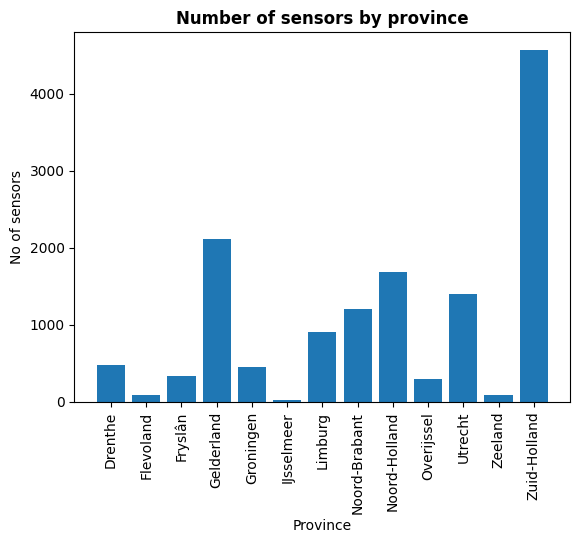

In [63]:
plt.bar(admin_counts['NAME_1'], admin_counts['sensor_count'])

plt.xticks(rotation=90)

plt.xlabel("Province")
plt.ylabel("No of sensors")
plt.title("Number of sensors by province", fontweight='bold')



plt.show()

#### Horizontal - the missing h

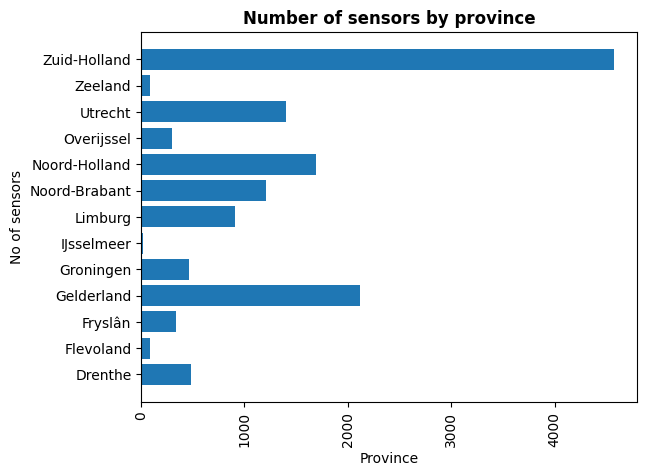

In [64]:
plt.barh(admin_counts['NAME_1'], admin_counts['sensor_count'])

plt.xticks(rotation=90)

plt.xlabel("Province")
plt.ylabel("No of sensors")
plt.title("Number of sensors by province", fontweight='bold')



plt.show()

### 5.6: Bringing together two dataframes

#### Now we have a pandas DataFrame with the number of sensors per municipality. What if we want to visualise this on a map? How do we add the geographic information? What function can we use?

#### Question: What column do they have in common?

In [65]:
# Merge the DataFrames
merged_df = pd.merge(admin, admin_counts, on='NAME_1')

In [66]:
merged_df.head()

GID_2 GID_0      COUNTRY    GID_1   NAME_1 NL_NAME_1         NAME_2  \
0  NLD.1.1_1   NLD  Netherlands  NLD.1_1  Drenthe        NA      AaenHunze   
1  NLD.1.2_1   NLD  Netherlands  NLD.1_1  Drenthe        NA          Assen   
2  NLD.1.3_1   NLD  Netherlands  NLD.1_1  Drenthe        NA  Borger-Odoorn   
3  NLD.1.4_1   NLD  Netherlands  NLD.1_1  Drenthe        NA      Coevorden   
4  NLD.1.5_1   NLD  Netherlands  NLD.1_1  Drenthe        NA       DeWolden   

  VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2    HASC_2  \
0        NA        NA  Gemeente  Municipality   NA  NL.DR.AH   
1        NA        NA  Gemeente  Municipality   NA  NL.DR.AS   
2        NA        NA  Gemeente  Municipality   NA  NL.DR.BO   
3        NA        NA  Gemeente  Municipality   NA  NL.DR.CO   
4        NA        NA  Gemeente  Municipality   NA  NL.DR.DW   

                                            geometry  \
0  MULTIPOLYGON (((234495.023 551702.305, 235801....   
1  MULTIPOLYGON (((239107.096 560595.343, 239004....   
2  MULTIPOLYGON (((246451.501 544422.207, 245743....   
3  MULTIPOLYGON (((255443.223 519422.409, 254969....   
4  MULTIPOLYGON (((214933.132 520438.735, 215142....   

                        centroid  sensor_count  
0  POINT (245622.559 557075.237)           478  
1  POINT (233827.147 557762.869)           478  
2  POINT (255381.222 547561.354)           478  
3  POINT (246762.103 529038.492)           478  
4  POINT (222237.379 524277.954)           478

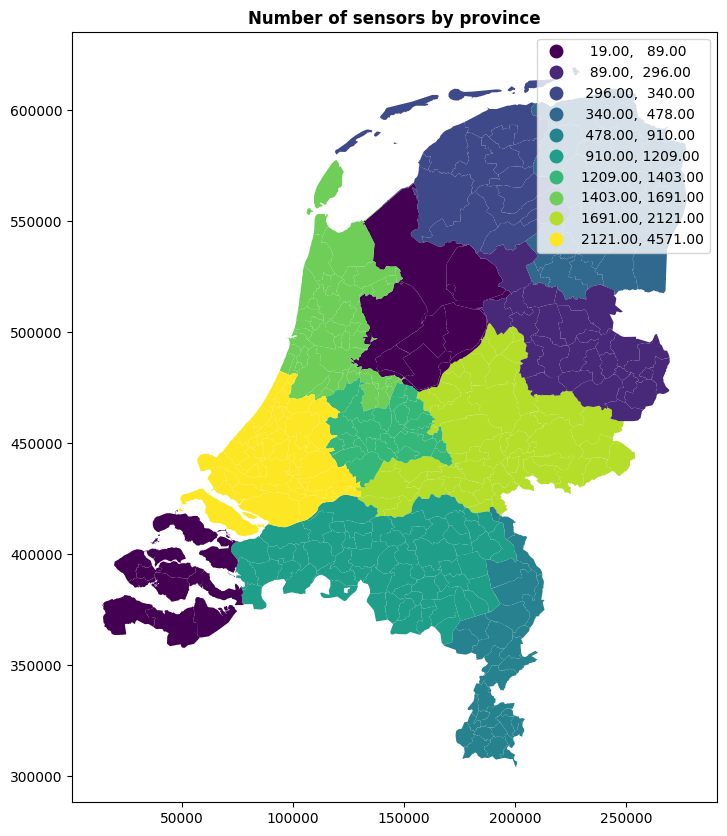

In [70]:
merged_df.plot('sensor_count',
               figsize=(10,10),
               legend=True,
               scheme='natural_breaks',
               k=10
               )

plt.title("Number of sensors by province", fontweight='bold')

plt.savefig('../results/figures/Overview_samenmeten_sensors.png', dpi=300, bbox_inches='tight')

#### Question: What new element did we use?

`scheme`; Using 'mapclassify', part of Python Spatial Analysis Library (PySAL). 

Other options: 
- "equal_interval": mapclassify.EqualInterval,
- "fisher_jenks": mapclassify.FisherJenks,
- "jenks_caspall": mapclassify.JenksCaspall,
- "jenks_caspall_forced": mapclassify.JenksCaspallForced,
- "maximum_breaks": mapclassify.MaximumBreaks,
- "quantiles": mapclassify.Quantiles,

and: `plt.savefig()`

More: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html 

### JupyterLab, (Geo-)Pandas and co. -> your one stop shop for geospatial analysis. 

We hope you've seen that:
- You can have an entire analysis flow within JupyterLab, including documentation.
- GeoPandas and related libraries can do (almost) anything you can do within QGIS/ArcGIS, and more.
- By using Jupyter/code, your analysis easily repeated (by you), reproduced (by others) and expanded (by you and others).

## Part 6: Time for you to shine

### We now know that Zuid-Holland has got the most sensors. But how are sensors distributed among the __Buurten__ (Neighbourhoods) within Zuid-Holland?

This is for you to find out: 

### Your task:

- Import and answer a few questions related to a new dataset of buurten
- Find a way to count the sensors per buurt
- Make a graph and basic map of the sensor distribution.
- BONUS: Make an interactive map.


### Materials:

Data:
- Buurten dataset for Zuid-Holland (../data/raw_data/wijkenbuurten_2022_ZH_exercise.json)
    
    
Source of Wijk/Buurt: https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2022

### Task 1: Load new dataset and answer the following questions:

#### How many columns does the DataFrame have? `Answer:`
#### How many 'Buurten' are there in Zuid-Holland? `Answer:`

#### What is the name of the buurt in row 4 and how many people live there?`Answer:`. 

#### What are the names of the last 10 Buurten in the DataFrame?

#### Which Buurten are in rows 6 (`Answer: `) and rows 234-236 (`Answer: `)

#### How many Buurten are in Leiden? `Answer:`

### Task 2: Plot the dataframe:

- give the plot a size of 10,10
- set the color by municipality
- use a custom colormap, e.g. 'viridis' (or any found here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- change the color of the outlines to white
- give the plot a title
- save the plot to results/figures/

### Task 3: Let's look at the distribution of sensors in Zuid-Holland:

- Which buurt has got the most sensors? `Answer:`
- What is the average no. of sensors per buurt? `Answer:`

There are a few steps involved in this? Can you remember what to do?


### Task 4: Let's filter and look specifically at Rotterdam. 

#### Question: What is the buurt with the most sensors in Rotterdam? `Answer:`

#### Task 5: Make a basic bar plot showing the buurten and number of sensors

### Task 6: Make a basic map showing the numbers of sensors per buurt in Rotterdam. 

- give the map a custom size (make sure it fits the extent nicely)
- use a scheme of your choice
- add a legend
- add a title
- remove unneccessary elements (ticks, grid)
- save the plot to results/figures (as png/jpg)

This time, try and make the map prettier by playing around with:
- plot(
    - figsize
    - edgecolor
    - scheme
    - legend
    - k
    - )

- plt.title()
- plt.xticks()
- plt.yticks()


- plt.gca() # get current axis
- ax.grid()
- ax.set_frame_on()

- plt.savefig()



more info and fun customization: https://geopandas.org/en/stable/docs/user_guide/mapping.html

#### Bonus question: Why do we not see all of the Buurten, and how do you make them visible?

### Task 6; Bonus: Making maps pretty & interactive


As you saw, there are many parts of matplotlib you can customize. But, ultimately __you'll create a static map__. This isn't very engaging.


Instead, why not create an __interactive map?__

Luckily, GeoPandas comes with the _folium_ library already integrated. 

All you need to do is call ```gdf.explore()```. Try it, and make a beautiful interactive map.

A few hints of functions:

- column
- tooltip
- scheme
- k
- tiles
- cmap

More info: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html

__Bonus bonus:__ Can you figure out how to add multiple layers to a interactive folium map?

In [ ]:
# The basics
m = rdam.explore()

m